# Description
Train different classical ML models with all electrodes.

In [ ]:
import sys
sys.path.append('../../src')  
from data_loading import load_and_combine_mat_data
from preprocessing import preprocess_data
from evaluation import evaluate_model
from feature_selection import get_subject_indices
from ml_feature_extraction import extract_features

from sklearn import svm
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch, butter, filtfilt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import RobustScaler
from scipy.stats import kurtosis, skew, entropy
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [7]:
# List of all .mat file paths for each subject
mat_file_paths = [
    '../../data/Subject_1.mat',
    '../../data/Subject_2.mat',
    '../../data/Subject_3.mat',
    '../../data/Subject_4.mat',
    '../../data/Subject_5.mat',
    '../../data/Subject_6.mat',
    '../../data/Subject_7.mat',
    '../../data/Subject_8.mat',
    '../../data/Subject_9.mat',
    '../../data/Subject_10.mat',
]

# Define classifiers
classifiers = {
    "SVM": svm.SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Initialize a dictionary to hold results
results = {
    "Subject": [],
    "Feature Set": [],
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

# Loop through each subject
for subject_num, mat_file_path in enumerate(mat_file_paths, start=1):
    print(f"\nEvaluating models for Subject {subject_num}...")

    # Load data for the current subject
    X, y, Channels = load_and_combine_mat_data([mat_file_path])

    # Preprocess data
    X_preprocessed = preprocess_data(X)

    # Extract features
    feature_matrix_time, feature_matrix_freq = extract_features(X_preprocessed)
    features_combined = np.hstack((feature_matrix_time, feature_matrix_freq))

    # Define feature sets
    feature_sets = {
        "Time Domain": feature_matrix_time,
        "Frequency Domain": feature_matrix_freq,
        "Both": features_combined
    }

    # Evaluate each feature set for the current subject
    for feature_name, feature_data in feature_sets.items():
        print(f"\nEvaluating classifiers using {feature_name} features for Subject {subject_num}...")

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(feature_data, y, test_size=0.2, random_state=42, stratify=y)
        
        # Initialize RobustScaler and fit on training data, transform both train and test data
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
                                         
        # Loop over each classifier
        for name, model in classifiers.items():
            print(f"\nEvaluating {name} with {feature_name} features for Subject {subject_num}...")

            # Train the model
            model.fit(X_train, y_train)

            # Evaluate the model
            evaluation_results = evaluate_model(model, X_test_scaled, y_test, X_train_scaled, y_train)

            # Store results
            results["Subject"].append(subject_num)
            results["Feature Set"].append(feature_name)
            results["Classifier"].append(name)
            results["Train Accuracy"].append(evaluation_results['train_accuracy'])
            results["Test Accuracy"].append(evaluation_results['test_accuracy'])

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(results)



Evaluating models for Subject 1...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 200)
Combined Labels Shape: (200,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.525
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.55      0.60      0.57        10
         1.0       0.55      0.60      0.57        10
         2.0       0.50      0.40      0.44        10
         3.0       0.50      0.50      0.50        10

    accuracy                           0.53        40
   macro avg       0.52      0.53      0.52        40
weighted avg       0.52      0.53      0.52        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating classifiers using 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.35
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        10
         1.0       0.25      0.30      0.27        10
         2.0       0.12      0.10      0.11        10
         3.0       0.40      0.40      0.40        10

    accuracy                           0.35        40
   macro avg       0.34      0.35      0.35        40
weighted avg       0.34      0.35      0.35        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating classifiers using B

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:16:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.475
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.70      0.58        10
         1.0       0.36      0.40      0.38        10
         2.0       0.33      0.20      0.25        10
         3.0       0.67      0.60      0.63        10

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.46        40
weighted avg       0.47      0.47      0.46        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating models for Subject

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4166666666666667
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        12
         1.0       0.43      0.50      0.46        12
         2.0       0.43      0.50      0.46        12
         3.0       0.36      0.33      0.35        12

    accuracy                           0.42        48
   macro avg       0.42      0.42      0.41        48
weighted avg       0.42      0.42      0.41        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:20:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3333333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.25      0.17      0.20        12
         1.0       0.25      0.25      0.25        12
         2.0       0.55      0.50      0.52        12
         3.0       0.29      0.42      0.34        12

    accuracy                           0.33        48
   macro avg       0.33      0.33      0.33        48
weighted avg       0.33      0.33      0.33        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:21:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3541666666666667
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.40      0.17      0.24        12
         1.0       0.31      0.42      0.36        12
         2.0       0.36      0.42      0.38        12
         3.0       0.38      0.42      0.40        12

    accuracy                           0.35        48
   macro avg       0.36      0.35      0.34        48
weighted avg       0.36      0.35      0.34        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:23:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4444444444444444
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.31      0.44      0.36         9
         1.0       0.67      0.44      0.53         9
         2.0       0.30      0.33      0.32         9
         3.0       0.71      0.56      0.62         9

    accuracy                           0.44        36
   macro avg       0.50      0.44      0.46        36
weighted avg       0.50      0.44      0.46        36

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        36
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        36

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3611111111111111
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.38      0.33      0.35         9
         1.0       0.67      0.67      0.67         9
         2.0       0.23      0.33      0.27         9
         3.0       0.17      0.11      0.13         9

    accuracy                           0.36        36
   macro avg       0.36      0.36      0.36        36
weighted avg       0.36      0.36      0.36        36

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        36
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        36

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3333333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.22      0.22      0.22         9
         1.0       0.36      0.44      0.40         9
         2.0       0.33      0.44      0.38         9
         3.0       0.50      0.22      0.31         9

    accuracy                           0.33        36
   macro avg       0.35      0.33      0.33        36
weighted avg       0.35      0.33      0.33        36

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        36
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        36

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144


Evaluating model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:28:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.45      0.42      0.43        12
         1.0       0.44      0.33      0.38        12
         2.0       0.56      0.75      0.64        12
         3.0       0.50      0.50      0.50        12

    accuracy                           0.50        48
   macro avg       0.49      0.50      0.49        48
weighted avg       0.49      0.50      0.49        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating classifiers using Fr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:28:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4375
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.60      0.50      0.55        12
         1.0       0.57      0.67      0.62        12
         2.0       0.22      0.17      0.19        12
         3.0       0.33      0.42      0.37        12

    accuracy                           0.44        48
   macro avg       0.43      0.44      0.43        48
weighted avg       0.43      0.44      0.43        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating classifiers using

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:29:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.375
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.31      0.33      0.32        12
         1.0       0.30      0.25      0.27        12
         2.0       0.50      0.50      0.50        12
         3.0       0.38      0.42      0.40        12

    accuracy                           0.38        48
   macro avg       0.37      0.38      0.37        48
weighted avg       0.37      0.38      0.37        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating models for Subject

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5416666666666666
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57        12
         1.0       0.58      0.58      0.58        12
         2.0       0.57      0.33      0.42        12
         3.0       0.54      0.58      0.56        12

    accuracy                           0.54        48
   macro avg       0.55      0.54      0.53        48
weighted avg       0.55      0.54      0.53        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:33:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3958333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.42      0.45        12
         1.0       0.42      0.42      0.42        12
         2.0       0.25      0.25      0.25        12
         3.0       0.43      0.50      0.46        12

    accuracy                           0.40        48
   macro avg       0.40      0.40      0.40        48
weighted avg       0.40      0.40      0.40        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        12
         1.0       0.55      0.50      0.52        12
         2.0       0.67      0.33      0.44        12
         3.0       0.38      0.50      0.43        12

    accuracy                           0.50        48
   macro avg       0.53      0.50      0.50        48
weighted avg       0.53      0.50      0.50        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating models for Subject 6

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5227272727272727
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.35      0.55      0.43        11
         2.0       0.50      0.55      0.52        11
         3.0       0.60      0.27      0.38        11

    accuracy                           0.52        44
   macro avg       0.56      0.52      0.52        44
weighted avg       0.56      0.52      0.52        44

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        43
         2.0       1.00      1.00      1.00        43
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.45454545454545453
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.60      0.55      0.57        11
         1.0       0.40      0.36      0.38        11
         2.0       0.38      0.55      0.44        11
         3.0       0.50      0.36      0.42        11

    accuracy                           0.45        44
   macro avg       0.47      0.45      0.45        44
weighted avg       0.47      0.45      0.45        44

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        43
         2.0       1.00      1.00      1.00        43
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172


Evaluating clas

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4772727272727273
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.58      0.64      0.61        11
         1.0       0.46      0.55      0.50        11
         2.0       0.46      0.55      0.50        11
         3.0       0.33      0.18      0.24        11

    accuracy                           0.48        44
   macro avg       0.46      0.48      0.46        44
weighted avg       0.46      0.48      0.46        44

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        43
         2.0       1.00      1.00      1.00        43
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172


Evaluating model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3333333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.22      0.17      0.19        12
         1.0       0.36      0.42      0.38        12
         2.0       0.37      0.58      0.45        12
         3.0       0.33      0.17      0.22        12

    accuracy                           0.33        48
   macro avg       0.32      0.33      0.31        48
weighted avg       0.32      0.33      0.31        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4166666666666667
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.58      0.54        12
         1.0       0.33      0.42      0.37        12
         2.0       0.40      0.33      0.36        12
         3.0       0.44      0.33      0.38        12

    accuracy                           0.42        48
   macro avg       0.42      0.42      0.41        48
weighted avg       0.42      0.42      0.41        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.3541666666666667
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.30      0.25      0.27        12
         1.0       0.38      0.42      0.40        12
         2.0       0.41      0.58      0.48        12
         3.0       0.25      0.17      0.20        12

    accuracy                           0.35        48
   macro avg       0.34      0.35      0.34        48
weighted avg       0.34      0.35      0.34        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:46:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.525
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.29      0.20      0.24        10
         1.0       0.45      0.50      0.48        10
         2.0       0.54      0.70      0.61        10
         3.0       0.78      0.70      0.74        10

    accuracy                           0.53        40
   macro avg       0.51      0.52      0.51        40
weighted avg       0.51      0.53      0.51        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating classifiers using 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:46:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.45
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44        10
         1.0       0.00      0.00      0.00        10
         2.0       0.47      0.80      0.59        10
         3.0       0.60      0.60      0.60        10

    accuracy                           0.45        40
   macro avg       0.39      0.45      0.41        40
weighted avg       0.39      0.45      0.41        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating classifiers using B

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.45
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.20      0.10      0.13        10
         1.0       0.38      0.30      0.33        10
         2.0       0.39      0.70      0.50        10
         3.0       0.78      0.70      0.74        10

    accuracy                           0.45        40
   macro avg       0.44      0.45      0.43        40
weighted avg       0.44      0.45      0.43        40

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Evaluating models for Subject 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:50:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4583333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.46      0.50      0.48        12
         1.0       0.40      0.33      0.36        12
         2.0       0.64      0.58      0.61        12
         3.0       0.36      0.42      0.38        12

    accuracy                           0.46        48
   macro avg       0.46      0.46      0.46        48
weighted avg       0.46      0.46      0.46        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:51:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.375
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.22      0.17      0.19        12
         1.0       0.38      0.50      0.43        12
         2.0       0.45      0.42      0.43        12
         3.0       0.42      0.42      0.42        12

    accuracy                           0.38        48
   macro avg       0.37      0.38      0.37        48
weighted avg       0.37      0.38      0.37        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating classifiers using 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:52:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4583333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.42      0.42      0.42        12
         1.0       0.43      0.50      0.46        12
         2.0       0.64      0.58      0.61        12
         3.0       0.36      0.33      0.35        12

    accuracy                           0.46        48
   macro avg       0.46      0.46      0.46        48
weighted avg       0.46      0.46      0.46        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:55:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.4583333333333333
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.42      0.45        12
         1.0       0.50      0.67      0.57        12
         2.0       0.80      0.33      0.47        12
         3.0       0.29      0.42      0.34        12

    accuracy                           0.46        48
   macro avg       0.52      0.46      0.46        48
weighted avg       0.52      0.46      0.46        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5208333333333334
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.58      0.58      0.58        12
         1.0       0.55      0.50      0.52        12
         2.0       0.50      0.50      0.50        12
         3.0       0.46      0.50      0.48        12

    accuracy                           0.52        48
   macro avg       0.52      0.52      0.52        48
weighted avg       0.52      0.52      0.52        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192


Evaluating class

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.5416666666666666
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        12
         1.0       0.43      0.83      0.57        12
         2.0       0.64      0.58      0.61        12
         3.0       0.60      0.25      0.35        12

    accuracy                           0.54        48
   macro avg       0.58      0.54      0.53        48
weighted avg       0.58      0.54      0.53        48

Train Accuracy: 1.0
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        48
         3.0       1.00      1.00      1.00        48

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



<ipython-input-8-0508b0496d82>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


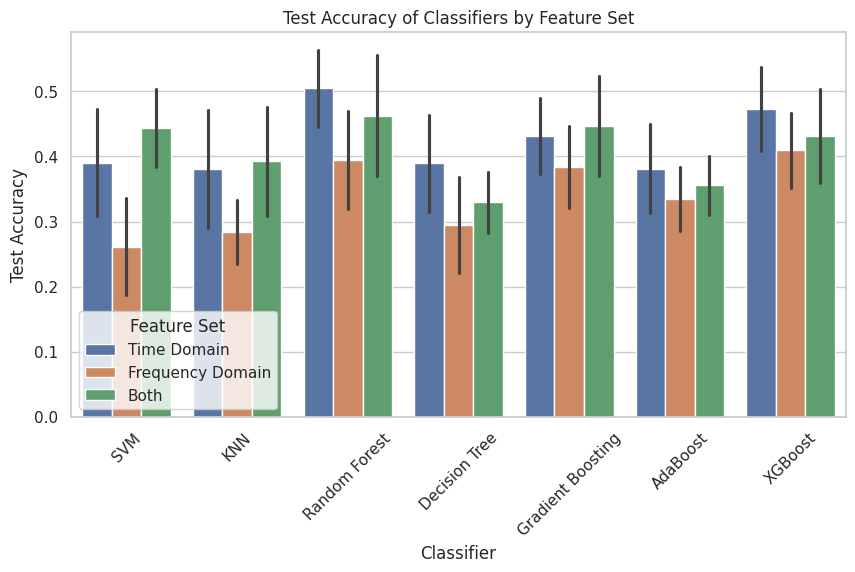

<ipython-input-8-0508b0496d82>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


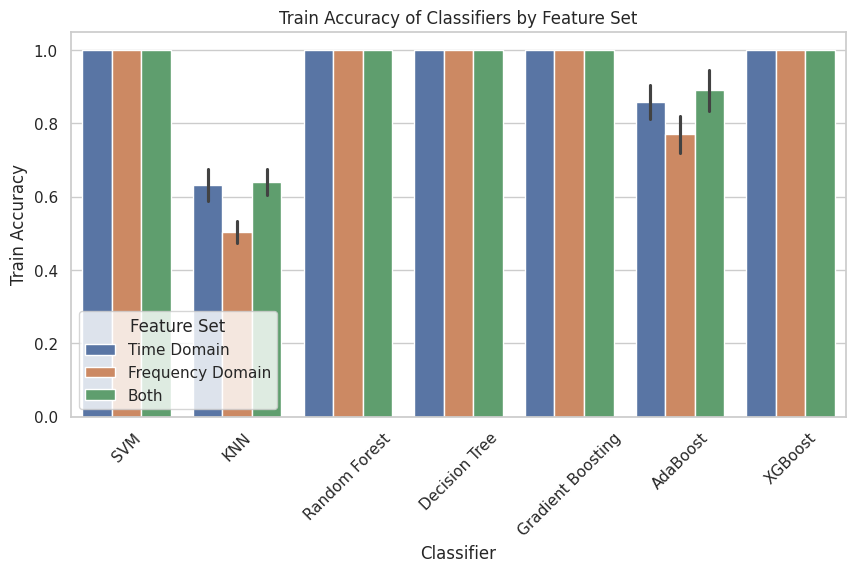

In [8]:
sns.set(style="whitegrid")

# Plot Test Accuracy by Classifier and Feature Set for each Subject
plt.figure(figsize=(10, 5))
sns.barplot(
    data=results_df,
    x="Classifier",
    y="Test Accuracy",
    hue="Feature Set",
    ci="sd",
)
plt.title("Test Accuracy of Classifiers by Feature Set")
plt.xlabel("Classifier")
plt.ylabel("Test Accuracy")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.show()

# Plot Train Accuracy by Classifier and Feature Set for each Subject
plt.figure(figsize=(10, 5))
sns.barplot(
    data=results_df,
    x="Classifier",
    y="Train Accuracy",
    hue="Feature Set",
    ci="sd",
)
plt.title("Train Accuracy of Classifiers by Feature Set")
plt.xlabel("Classifier")
plt.ylabel("Train Accuracy")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.show()


# cross validation

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_splits = 5

# Initialize a list to collect all results for each subject
all_results = []

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each subject
for subject_num, mat_file_path in enumerate(mat_file_paths, start=1):
    print(f"\nEvaluating models for Subject {subject_num}...")

    # Load data for the current subject
    X, y, Channels = load_and_combine_mat_data([mat_file_path])

    # Preprocess data
    X_preprocessed = preprocess_data(X)

    # Extract features
    feature_matrix_time, feature_matrix_freq = extract_features(X_preprocessed)
    features_combined = np.hstack((feature_matrix_time, feature_matrix_freq))

    # Define feature sets
    feature_sets = {
        "Time Domain": feature_matrix_time,
        "Frequency Domain": feature_matrix_freq,
        "Both": features_combined
    }

    # Initialize dictionary to store cross-validation results for the current subject
    cv_results = {feature_name: [] for feature_name in feature_sets}

    # Loop through each feature set
    for feature_name, feature_data in feature_sets.items():
        print(f"\nPerforming cross-validation for {feature_name} features on Subject {subject_num}...")

        # Loop through each classifier
        for name, model in classifiers.items():
            pipeline = Pipeline([
                    ('scaler', RobustScaler()),
                    ('classifier', model)
                ])
            
            # Perform cross-validation and store the mean accuracy
            scores = cross_val_score(pipeline, feature_data, y, cv=cv, scoring='accuracy')

            # Store results in a dictionary for this subject, feature set, and classifier
            result = {
                'Subject': subject_num,
                'Feature Set': feature_name,
                'Classifier': name,
                'Mean Accuracy': np.mean(scores),
                'Std Dev': np.std(scores)
            }
            all_results.append(result)  # Collect results for later use

            # Print results for this classifier and feature set
            print(f"{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")

# Convert all results to a DataFrame for analysis
results_df = pd.DataFrame(all_results)

# Display the DataFrame to review all results for each subject
print(results_df)





Evaluating models for Subject 1...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 200)
Combined Labels Shape: (200,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:03:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4950, Std Dev: 0.0927

Performing cross-validation for Frequency Domain features on Subject 1...
SVM - Mean Accuracy: 0.2850, Std Dev: 0.0644
KNN - Mean Accuracy: 0.3100, Std Dev: 0.0663
Random Forest - Mean Accuracy: 0.4900, Std Dev: 0.0889
Decision Tree - Mean Accuracy: 0.3300, Std Dev: 0.0485
Gradient Boosting - Mean Accuracy: 0.3750, Std Dev: 0.0158
AdaBoost - Mean Accuracy: 0.3600, Std Dev: 0.0644


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:04:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:04:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:05:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:05:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4350, Std Dev: 0.0718

Performing cross-validation for Both features on Subject 1...
SVM - Mean Accuracy: 0.3950, Std Dev: 0.0828
KNN - Mean Accuracy: 0.3900, Std Dev: 0.0464
Random Forest - Mean Accuracy: 0.4850, Std Dev: 0.1125
Decision Tree - Mean Accuracy: 0.3350, Std Dev: 0.0374
Gradient Boosting - Mean Accuracy: 0.4700, Std Dev: 0.0781
AdaBoost - Mean Accuracy: 0.3800, Std Dev: 0.0828


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:09:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:10:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:10:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:10:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4600, Std Dev: 0.1420

Evaluating models for Subject 2...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.5083, Std Dev: 0.0520

Performing cross-validation for Frequency Domain features on Subject 2...
SVM - Mean Accuracy: 0.2750, Std Dev: 0.0664
KNN - Mean Accuracy: 0.2625, Std Dev: 0.0339
Random Forest - Mean Accuracy: 0.4333, Std Dev: 0.0445
Decision Tree - Mean Accuracy: 0.3042, Std Dev: 0.0775
Gradient Boosting - Mean Accuracy: 0.4250, Std Dev: 0.0680
AdaBoost - Mean Accuracy: 0.3958, Std Dev: 0.0543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4542, Std Dev: 0.0517

Performing cross-validation for Both features on Subject 2...
SVM - Mean Accuracy: 0.4292, Std Dev: 0.0626
KNN - Mean Accuracy: 0.3875, Std Dev: 0.0553
Random Forest - Mean Accuracy: 0.5042, Std Dev: 0.0702
Decision Tree - Mean Accuracy: 0.3625, Std Dev: 0.0503
Gradient Boosting - Mean Accuracy: 0.4750, Std Dev: 0.0702
AdaBoost - Mean Accuracy: 0.3833, Std Dev: 0.0598


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:25:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4750, Std Dev: 0.0702

Evaluating models for Subject 3...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 180)
Combined Labels Shape: (180,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4389, Std Dev: 0.1089

Performing cross-validation for Frequency Domain features on Subject 3...
SVM - Mean Accuracy: 0.2222, Std Dev: 0.0304
KNN - Mean Accuracy: 0.2611, Std Dev: 0.0515
Random Forest - Mean Accuracy: 0.3778, Std Dev: 0.0648
Decision Tree - Mean Accuracy: 0.2778, Std Dev: 0.1152
Gradient Boosting - Mean Accuracy: 0.3833, Std Dev: 0.0478
AdaBoost - Mean Accuracy: 0.2556, Std Dev: 0.0969


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3667, Std Dev: 0.0509

Performing cross-validation for Both features on Subject 3...
SVM - Mean Accuracy: 0.4222, Std Dev: 0.0969
KNN - Mean Accuracy: 0.3278, Std Dev: 0.0920
Random Forest - Mean Accuracy: 0.4167, Std Dev: 0.0896
Decision Tree - Mean Accuracy: 0.3333, Std Dev: 0.0766
Gradient Boosting - Mean Accuracy: 0.4889, Std Dev: 0.1274
AdaBoost - Mean Accuracy: 0.3889, Std Dev: 0.1361


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:37:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4500, Std Dev: 0.0850

Evaluating models for Subject 4...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:45:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4042, Std Dev: 0.1026

Performing cross-validation for Frequency Domain features on Subject 4...
SVM - Mean Accuracy: 0.2500, Std Dev: 0.0543
KNN - Mean Accuracy: 0.3083, Std Dev: 0.0580
Random Forest - Mean Accuracy: 0.3958, Std Dev: 0.0475
Decision Tree - Mean Accuracy: 0.2958, Std Dev: 0.0580
Gradient Boosting - Mean Accuracy: 0.3917, Std Dev: 0.1024
AdaBoost - Mean Accuracy: 0.2958, Std Dev: 0.0404


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:47:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:47:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3667, Std Dev: 0.0429

Performing cross-validation for Both features on Subject 4...
SVM - Mean Accuracy: 0.3792, Std Dev: 0.0637
KNN - Mean Accuracy: 0.3167, Std Dev: 0.0243
Random Forest - Mean Accuracy: 0.4000, Std Dev: 0.0784
Decision Tree - Mean Accuracy: 0.3208, Std Dev: 0.0752
Gradient Boosting - Mean Accuracy: 0.4125, Std Dev: 0.0565
AdaBoost - Mean Accuracy: 0.3458, Std Dev: 0.0654


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:53:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:53:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4208, Std Dev: 0.0926

Evaluating models for Subject 5...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4000, Std Dev: 0.0517

Performing cross-validation for Frequency Domain features on Subject 5...
SVM - Mean Accuracy: 0.2375, Std Dev: 0.0339
KNN - Mean Accuracy: 0.2167, Std Dev: 0.0786
Random Forest - Mean Accuracy: 0.3833, Std Dev: 0.0553
Decision Tree - Mean Accuracy: 0.3042, Std Dev: 0.0568
Gradient Boosting - Mean Accuracy: 0.3917, Std Dev: 0.0243
AdaBoost - Mean Accuracy: 0.2500, Std Dev: 0.0543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:04:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:04:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:04:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:04:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4250, Std Dev: 0.0250

Performing cross-validation for Both features on Subject 5...
SVM - Mean Accuracy: 0.3417, Std Dev: 0.0408
KNN - Mean Accuracy: 0.3875, Std Dev: 0.0705
Random Forest - Mean Accuracy: 0.4625, Std Dev: 0.0333
Decision Tree - Mean Accuracy: 0.3792, Std Dev: 0.0565
Gradient Boosting - Mean Accuracy: 0.4167, Std Dev: 0.0437
AdaBoost - Mean Accuracy: 0.3125, Std Dev: 0.0349


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:10:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:10:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4667, Std Dev: 0.0667

Evaluating models for Subject 6...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 216)
Combined Labels Shape: (216,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4492, Std Dev: 0.0762

Performing cross-validation for Frequency Domain features on Subject 6...
SVM - Mean Accuracy: 0.2780, Std Dev: 0.0876
KNN - Mean Accuracy: 0.3103, Std Dev: 0.0382
Random Forest - Mean Accuracy: 0.4023, Std Dev: 0.0664
Decision Tree - Mean Accuracy: 0.3190, Std Dev: 0.0584
Gradient Boosting - Mean Accuracy: 0.4487, Std Dev: 0.0585
AdaBoost - Mean Accuracy: 0.2963, Std Dev: 0.0173


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4536, Std Dev: 0.0417

Performing cross-validation for Both features on Subject 6...
SVM - Mean Accuracy: 0.4355, Std Dev: 0.0402
KNN - Mean Accuracy: 0.3704, Std Dev: 0.1091
Random Forest - Mean Accuracy: 0.4399, Std Dev: 0.0965
Decision Tree - Mean Accuracy: 0.3193, Std Dev: 0.0551
Gradient Boosting - Mean Accuracy: 0.4859, Std Dev: 0.0625
AdaBoost - Mean Accuracy: 0.3699, Std Dev: 0.0701


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:24:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:25:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4580, Std Dev: 0.0655

Evaluating models for Subject 7...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3708, Std Dev: 0.0243

Performing cross-validation for Frequency Domain features on Subject 7...
SVM - Mean Accuracy: 0.2750, Std Dev: 0.0404
KNN - Mean Accuracy: 0.2500, Std Dev: 0.0543
Random Forest - Mean Accuracy: 0.3500, Std Dev: 0.0333
Decision Tree - Mean Accuracy: 0.2917, Std Dev: 0.0543
Gradient Boosting - Mean Accuracy: 0.3792, Std Dev: 0.0761
AdaBoost - Mean Accuracy: 0.3292, Std Dev: 0.0464


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3917, Std Dev: 0.0482

Performing cross-validation for Both features on Subject 7...
SVM - Mean Accuracy: 0.3542, Std Dev: 0.0228
KNN - Mean Accuracy: 0.3417, Std Dev: 0.0612
Random Forest - Mean Accuracy: 0.4083, Std Dev: 0.0408
Decision Tree - Mean Accuracy: 0.2833, Std Dev: 0.0167
Gradient Boosting - Mean Accuracy: 0.3292, Std Dev: 0.0482
AdaBoost - Mean Accuracy: 0.2750, Std Dev: 0.0404


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:40:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:40:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:41:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3667, Std Dev: 0.0283

Evaluating models for Subject 8...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 200)
Combined Labels Shape: (200,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:48:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4450, Std Dev: 0.1495

Performing cross-validation for Frequency Domain features on Subject 8...
SVM - Mean Accuracy: 0.2100, Std Dev: 0.0539
KNN - Mean Accuracy: 0.2950, Std Dev: 0.0696
Random Forest - Mean Accuracy: 0.3900, Std Dev: 0.0604
Decision Tree - Mean Accuracy: 0.3250, Std Dev: 0.0500
Gradient Boosting - Mean Accuracy: 0.3800, Std Dev: 0.0843
AdaBoost - Mean Accuracy: 0.2450, Std Dev: 0.0400


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.3950, Std Dev: 0.1042

Performing cross-validation for Both features on Subject 8...
SVM - Mean Accuracy: 0.4900, Std Dev: 0.0718
KNN - Mean Accuracy: 0.3750, Std Dev: 0.0652
Random Forest - Mean Accuracy: 0.4950, Std Dev: 0.0914
Decision Tree - Mean Accuracy: 0.3600, Std Dev: 0.0539
Gradient Boosting - Mean Accuracy: 0.3950, Std Dev: 0.0927
AdaBoost - Mean Accuracy: 0.3900, Std Dev: 0.0700


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:53:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:54:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:54:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:54:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:54:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4550, Std Dev: 0.0620

Evaluating models for Subject 9...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', '

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:01:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:01:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:02:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:02:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:02:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4333, Std Dev: 0.1174

Performing cross-validation for Frequency Domain features on Subject 9...
SVM - Mean Accuracy: 0.3083, Std Dev: 0.0306
KNN - Mean Accuracy: 0.3125, Std Dev: 0.0295
Random Forest - Mean Accuracy: 0.4125, Std Dev: 0.1098
Decision Tree - Mean Accuracy: 0.3250, Std Dev: 0.0890
Gradient Boosting - Mean Accuracy: 0.4708, Std Dev: 0.0829
AdaBoost - Mean Accuracy: 0.4000, Std Dev: 0.0404


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:03:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4875, Std Dev: 0.1017

Performing cross-validation for Both features on Subject 9...
SVM - Mean Accuracy: 0.4083, Std Dev: 0.0786
KNN - Mean Accuracy: 0.3917, Std Dev: 0.0738
Random Forest - Mean Accuracy: 0.4375, Std Dev: 0.1298
Decision Tree - Mean Accuracy: 0.3292, Std Dev: 0.0404
Gradient Boosting - Mean Accuracy: 0.4750, Std Dev: 0.1106
AdaBoost - Mean Accuracy: 0.4000, Std Dev: 0.0963


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:09:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:10:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4625, Std Dev: 0.0963

Evaluating models for Subject 10...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 240)
Combined Labels Shape: (240,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:17:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4042, Std Dev: 0.0705

Performing cross-validation for Frequency Domain features on Subject 10...
SVM - Mean Accuracy: 0.2542, Std Dev: 0.0714
KNN - Mean Accuracy: 0.2250, Std Dev: 0.0726
Random Forest - Mean Accuracy: 0.4167, Std Dev: 0.0228
Decision Tree - Mean Accuracy: 0.3208, Std Dev: 0.0283
Gradient Boosting - Mean Accuracy: 0.3750, Std Dev: 0.0417
AdaBoost - Mean Accuracy: 0.3667, Std Dev: 0.0339


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4042, Std Dev: 0.0339

Performing cross-validation for Both features on Subject 10...
SVM - Mean Accuracy: 0.3625, Std Dev: 0.0741
KNN - Mean Accuracy: 0.4292, Std Dev: 0.0819
Random Forest - Mean Accuracy: 0.4292, Std Dev: 0.0840
Decision Tree - Mean Accuracy: 0.3042, Std Dev: 0.0429
Gradient Boosting - Mean Accuracy: 0.4208, Std Dev: 0.0333
AdaBoost - Mean Accuracy: 0.3958, Std Dev: 0.0543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:26:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.4875, Std Dev: 0.0449
     Subject  Feature Set         Classifier  Mean Accuracy   Std Dev
0          1  Time Domain                SVM       0.365000  0.033912
1          1  Time Domain                KNN       0.485000  0.040620
2          1  Time Domain      Random Forest       0.460000  0.086023
3          1  Time Domain      Decision Tree       0.320000  0.048477
4          1  Time Domain  Gradient Boosting       0.465000  0.060415
..       ...          ...                ...            ...       ...
205       10         Both      Random Forest       0.429167  0.083956
206       10         Both      Decision Tree       0.304167  0.042898
207       10         Both  Gradient Boosting       0.420833  0.033333
208       10         Both           AdaBoost       0.395833  0.054327
209       10         Both            XGBoost       0.487500  0.044876

[210 rows x 5 columns]


<ipython-input-11-88fc17d6e43c>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


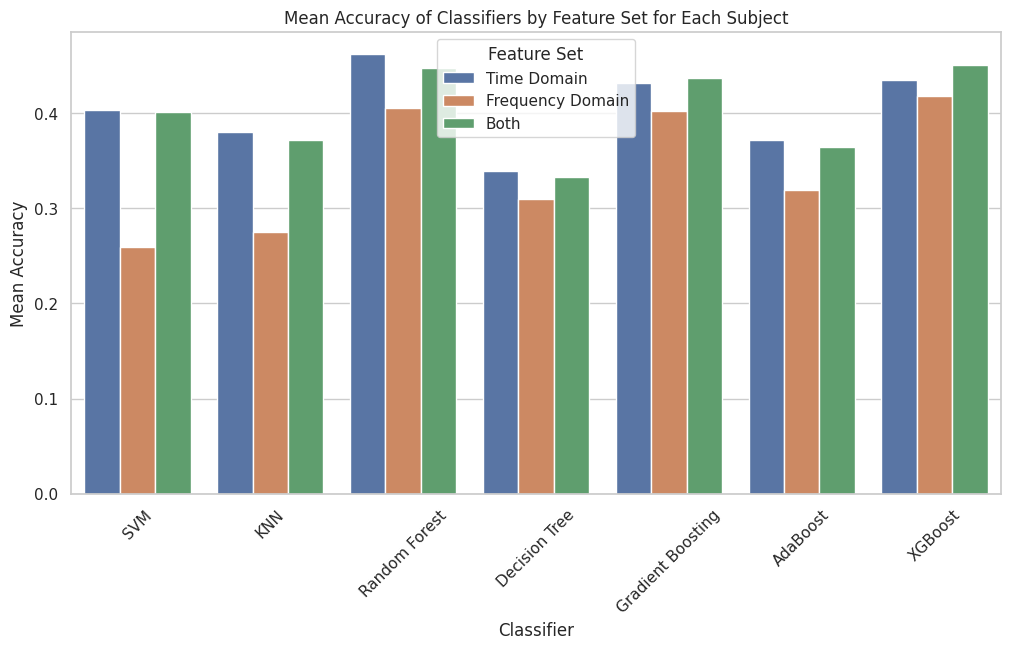

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for the plot
sns.set(style="whitegrid")

# Plot Mean Accuracy by Classifier and Feature Set for each Subject
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(
    data=results_df,
    x="Classifier",
    y="Mean Accuracy",
    hue="Feature Set",
    ci=None  # Disables the confidence interval (std dev) bars
)

# Add title and labels
plt.title("Mean Accuracy of Classifiers by Feature Set for Each Subject")
plt.xlabel("Classifier")
plt.ylabel("Mean Accuracy")

# Display legend
plt.legend(title="Feature Set")

# Adjust x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Random Forest": {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30]},
    "Gradient Boosting": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]},
    "AdaBoost": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 1]},
    "XGBoost": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 6]}
}

# Initialize a results dictionary to store the best parameters and accuracies
tuning_results = {
    "Subject": [],
    "Feature Set": [],
    "Classifier": [],
    "Best Parameters": [],
    "Best Cross-Validation Accuracy": []
}

# Cross-validation strategy
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each subject
for subject_num, mat_file_path in enumerate(mat_file_paths, start=1):
    print(f"\nTuning models for Subject {subject_num}...")

    # Load data for the current subject
    X, y, Channels = load_and_combine_mat_data([mat_file_path])

    # Preprocess data
    X_preprocessed = preprocess_data(X)

    # Extract features
    feature_matrix_time, feature_matrix_freq = extract_features(X_preprocessed)
    features_combined = np.hstack((feature_matrix_time, feature_matrix_freq))

    # Define feature sets
    feature_sets = {
        "Time Domain": feature_matrix_time,
        "Frequency Domain": feature_matrix_freq,
        "Both": features_combined
    }

    # Loop through each feature set
    for feature_name, feature_data in feature_sets.items():
        print(f"\nTuning classifiers using {feature_name} features for Subject {subject_num}...")

        # Loop through each classifier
        for name, model in classifiers.items():
            print(f"Hyperparameter tuning for {name} with {feature_name} features...")
            # Create a pipeline with RobustScaler and the model
            pipeline = Pipeline([
                ('scaler', RobustScaler()),
                ('classifier', model)
            ])
            # Set up GridSearchCV with the model and parameter grid
            grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grids[name],
                cv=cv,
                scoring='accuracy',
                n_jobs=-1
            )

            # Fit the grid search to the data
            grid_search.fit(feature_data, y)

            # Store the best parameters and accuracy
            tuning_results["Subject"].append(subject_num)
            tuning_results["Feature Set"].append(feature_name)
            tuning_results["Classifier"].append(name)
            tuning_results["Best Parameters"].append(grid_search.best_params_)
            tuning_results["Best Cross-Validation Accuracy"].append(grid_search.best_score_)

            print(f"Best parameters for {name}: {grid_search.best_params_}")
            print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Convert tuning results to a DataFrame for easy analysis
tuning_results_df = pd.DataFrame(tuning_results)
print(tuning_results_df)



Tuning models for Subject 1...
Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 200)
Combined Labels Shape: (200,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32'